## Plot results of mutation detection experiments

#### For now, we are running mutation detection experiments for the below genes (TP53, etc) for comparison with the figures in the BioBombe manuscript.

#### This gives a diversity of prediction difficulties (e.g. TP53 is fairly easy to predict, TTN is used as a negative control ,etc) but eventually we can run this for all of the top 50 mutated genes in TCGA.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [2]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'mutation')
df = None
raw_df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
    raw_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_raw_classify_metrics.tsv.gz'.format(gene_name))
    raw_file_df = pd.read_csv(raw_file, sep='\t')
    if raw_df is None:
        raw_df = raw_file_df
    else:
        raw_df = pd.concat((raw_df, raw_file_df))
df = df[df['data_type'] == 'cv']
raw_df = raw_df[raw_df['data_type'] == 'cv']
df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.77987,0.75991,TP53,signal,20,671155,pca,cv
5,0.76890,0.73031,TP53,signal,20,671155,nmf,cv
8,0.75110,0.70910,TP53,signal,20,671155,plier,cv
11,0.77986,0.75987,TP53,signal,20,365838,pca,cv
14,0.76936,0.73252,TP53,signal,20,365838,nmf,cv
17,0.75028,0.70764,TP53,signal,20,365838,plier,cv
20,0.77962,0.75973,TP53,signal,20,131932,pca,cv
23,0.76943,0.73343,TP53,signal,20,131932,nmf,cv
26,0.75047,0.70770,TP53,signal,20,131932,plier,cv
29,0.77792,0.75844,TP53,signal,20,121958,pca,cv


In [3]:
raw_df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.91682,0.88206,TP53,signal,8000,42,raw,cv
5,0.56873,0.52888,TP53,shuffled,8000,42,raw,cv
2,0.91707,0.74038,PTEN,signal,8000,42,raw,cv
5,0.62423,0.24805,PTEN,shuffled,8000,42,raw,cv
2,0.80211,0.61400,PIK3CA,signal,8000,42,raw,cv
5,0.52892,0.29553,PIK3CA,shuffled,8000,42,raw,cv
2,0.87120,0.73022,KRAS,signal,8000,42,raw,cv
5,0.53948,0.26645,KRAS,shuffled,8000,42,raw,cv
2,0.76751,0.66535,TTN,signal,8000,42,raw,cv
5,0.80626,0.69308,TTN,shuffled,8000,42,raw,cv


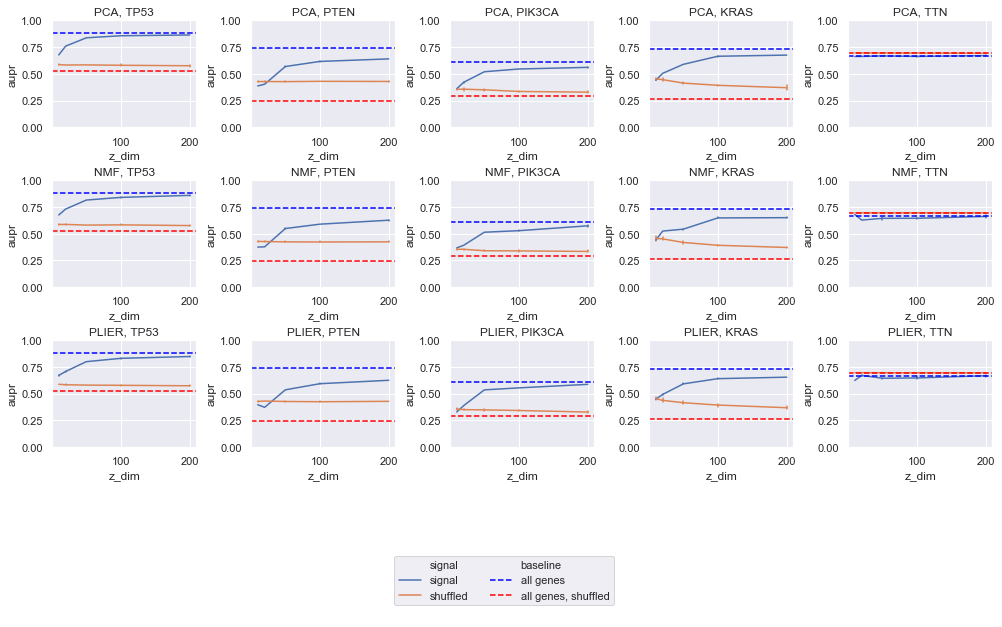

In [13]:
import warnings

sns.set()
fig, axarr = plt.subplots(3, 5)
fig.set_figwidth(14)
fig.set_figheight(9)

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for a_ix, alg in enumerate(['pca', 'nmf', 'plier']):
        for g_ix, gene_name in enumerate(genes):
            ax = axarr[a_ix, g_ix]
            gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                         (df['algorithm'] == alg)]
            sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='signal', 
                         err_style='bars', ax=ax)
            raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                              (raw_df['signal'] == 'signal')]['aupr'].values[0]
            shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                                   (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
            ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
            ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
            ax.set_ylim((0.0, 1.0))
            if a_ix == 1 and g_ix == len(genes)-1:
                handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            ax.set_title('{}, {}'.format(alg.upper(), gene_name))
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.3)
labels.insert(3, 'baseline')
handles.insert(3, handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)

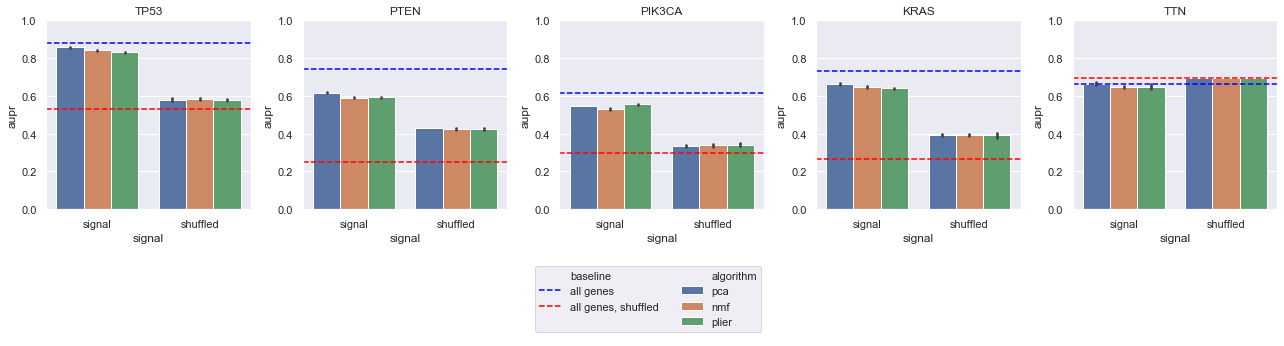

In [20]:
sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(18)
fig.set_figheight(5)

z_dim = 100
prev_handles = handles

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for g_ix, gene_name in enumerate(genes):
        ax = axarr[g_ix]
        gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                     (df['z_dim'] == z_dim)]
        sns.barplot(data=gene_df, x='signal', y='aupr', hue='algorithm', ax=ax)
        raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                          (raw_df['signal'] == 'signal')]['aupr'].values[0]
        shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                               (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
        ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
        ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
        ax.set_ylim((0.0, 1.0))
        if g_ix == len(genes)-1:
            handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_title(gene_name)
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.4)
labels.insert(0, 'baseline')
handles.insert(0, prev_handles[0])
labels.insert(3, '')
handles.insert(3, prev_handles[0])
labels.insert(4, 'algorithm')
handles.insert(4, prev_handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)